# Machine Learning

In [176]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
df = pd.read_csv('nba_preseason_team_stats.csv')
df

RANK TEAM  GP  W  L  WIN%   MIN    PTS   FGM   FGA  ...   REB   AST  \
0       1  GSW   6  6  0   1.0  48.0  112.7  40.7  86.3  ...  45.8  30.0   
1       2  BOS   5  4  1   0.8  48.0  121.8  42.8  95.0  ...  45.6  29.6   
2       2  LAC   5  4  1   0.8  48.0  105.8  38.8  81.8  ...  43.8  24.4   
3       2  MIA   5  4  1   0.8  48.0  112.6  41.0  90.2  ...  42.8  29.8   
4       2  NYK   5  4  1   0.8  48.0  114.2  39.6  91.6  ...  46.8  23.4   
..    ...  ...  .. .. ..   ...   ...    ...   ...   ...  ...   ...   ...   
730    15  MIL   1  0  1   0.0  48.0   94.0  32.0  75.0  ...  43.0  20.0   
731    15  NYK   1  0  1   0.0  48.0   86.0  30.0  79.0  ...  37.0  19.0   
732    15  ORL   2  0  2   0.0  48.0   93.5  34.0  74.5  ...  35.5  16.0   
733    15  PHI   1  0  1   0.0  53.0   79.0  26.0  79.0  ...  44.0   7.0   
734    15  PHX   1  0  1   0.0  48.0   79.0  26.0  78.0  ...  43.0  17.0   

      TOV   STL  BLK  BLKA    PF   PFD   +/-     YEAR  
0    17.8   8.8  6.0   4.5  20.5  18.3  17.3  2024-25  
1    12.2   9.8  5.6   1.2  20.2  21.6  16.6  2024-25  
2    19.0  13.6  7.0   5.2  19.0  21.0   9.2  2024-25  
3    16.0  15.2  4.4   5.4  22.4  21.6   3.2  2024-25  
4    12.6   8.8  4.2   5.0  17.8  24.6   7.0  2024-25  
..    ...   ...  ...   ...   ...   ...   ...      ...  
730  24.0   9.0  4.0   7.0  26.0   0.0 -11.0  2003-04  
731  19.0  11.0  5.0   7.0  28.0   0.0 -18.0  2003-04  
732  17.5  10.5  5.0   4.5  25.0   0.0  -8.5  2003-04  
733  20.0   7.0  3.0   6.0  30.0   0.0  -7.0  2003-04  
734  18.0   8.0  9.0   5.0  30.0   0.0 -22.0  2003-04  

[735 rows x 29 columns]

In [178]:
# Find total null values in each column
df.isnull().sum()

RANK      0
TEAM    127
GP        0
W         0
L         0
WIN%      0
MIN       0
PTS       0
FGM       0
FGA       0
FG%       0
3PM       0
3PA       0
3P%       0
FTM       0
FTA       0
FT%       0
OREB      0
DREB      0
REB       0
AST       0
TOV       0
STL       0
BLK       0
BLKA      0
PF        0
PFD       0
+/-       0
YEAR      0
dtype: int64

In [179]:
# Drop null rows
df = df.dropna(axis=0)

# Display
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 608 entries, 0 to 734
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    608 non-null    int64  
 1   TEAM    608 non-null    object 
 2   GP      608 non-null    int64  
 3   W       608 non-null    int64  
 4   L       608 non-null    int64  
 5   WIN%    608 non-null    float64
 6   MIN     608 non-null    float64
 7   PTS     608 non-null    float64
 8   FGM     608 non-null    float64
 9   FGA     608 non-null    float64
 10  FG%     608 non-null    float64
 11  3PM     608 non-null    float64
 12  3PA     608 non-null    float64
 13  3P%     608 non-null    float64
 14  FTM     608 non-null    float64
 15  FTA     608 non-null    float64
 16  FT%     608 non-null    float64
 17  OREB    608 non-null    float64
 18  DREB    608 non-null    float64
 19  REB     608 non-null    float64
 20  AST     608 non-null    float64
 21  TOV     608 non-null    float64
 22  STL    

In [180]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR'],
      dtype='object')

# Create new column eFG%

### Effective Field Goal Percentage (efG%) Is an advanced shooting metric that improves on regular FG% by accounting for the fact that 3-point shots are worth more than 2-point shots (ChatGPT)

📈 What Is a Good eFG%?

Great: 55%+

Average: ~52%

Poor: <50%

In [181]:
df['EFG%'] = (df['FGM'] + 0.5 * df['3PM']) / df['FGA']


C:\Users\admin\AppData\Local\Temp\ipykernel_4720\4190859183.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EFG%'] = (df['FGM'] + 0.5 * df['3PM']) / df['FGA']


In [182]:
df

RANK TEAM  GP  W  L  WIN%   MIN    PTS   FGM   FGA  ...   AST   TOV  \
0       1  GSW   6  6  0   1.0  48.0  112.7  40.7  86.3  ...  30.0  17.8   
1       2  BOS   5  4  1   0.8  48.0  121.8  42.8  95.0  ...  29.6  12.2   
2       2  LAC   5  4  1   0.8  48.0  105.8  38.8  81.8  ...  24.4  19.0   
3       2  MIA   5  4  1   0.8  48.0  112.6  41.0  90.2  ...  29.8  16.0   
4       2  NYK   5  4  1   0.8  48.0  114.2  39.6  91.6  ...  23.4  12.6   
..    ...  ...  .. .. ..   ...   ...    ...   ...   ...  ...   ...   ...   
730    15  MIL   1  0  1   0.0  48.0   94.0  32.0  75.0  ...  20.0  24.0   
731    15  NYK   1  0  1   0.0  48.0   86.0  30.0  79.0  ...  19.0  19.0   
732    15  ORL   2  0  2   0.0  48.0   93.5  34.0  74.5  ...  16.0  17.5   
733    15  PHI   1  0  1   0.0  53.0   79.0  26.0  79.0  ...   7.0  20.0   
734    15  PHX   1  0  1   0.0  48.0   79.0  26.0  78.0  ...  17.0  18.0   

      STL  BLK  BLKA    PF   PFD   +/-     YEAR      EFG%  
0     8.8  6.0   4.5  20.5  18.3  17.3  2024-25  0.565469  
1     9.8  5.6   1.2  20.2  21.6  16.6  2024-25  0.552632  
2    13.6  7.0   5.2  19.0  21.0   9.2  2024-25  0.530562  
3    15.2  4.4   5.4  22.4  21.6   3.2  2024-25  0.528825  
4     8.8  4.2   5.0  17.8  24.6   7.0  2024-25  0.500000  
..    ...  ...   ...   ...   ...   ...      ...       ...  
730   9.0  4.0   7.0  26.0   0.0 -11.0  2003-04  0.440000  
731  11.0  5.0   7.0  28.0   0.0 -18.0  2003-04  0.398734  
732  10.5  5.0   4.5  25.0   0.0  -8.5  2003-04  0.479866  
733   7.0  3.0   6.0  30.0   0.0  -7.0  2003-04  0.335443  
734   8.0  9.0   5.0  30.0   0.0 -22.0  2003-04  0.346154  

[608 rows x 30 columns]

In [183]:
# Find columns that impact Points for each team
correlation = df.corr(numeric_only=True)
print(correlation['PTS'].sort_values(ascending=False))

PTS     1.000000
FGM     0.921673
3PM     0.763258
EFG%    0.759041
AST     0.758340
FGA     0.745578
3PA     0.712318
DREB    0.641587
REB     0.599910
FG%     0.518513
MIN     0.441495
+/-     0.435576
PFD     0.422624
WIN%    0.339109
3P%     0.315538
FT%     0.252149
W       0.232588
STL     0.185202
BLK     0.170592
BLKA    0.086132
FTM     0.043904
GP      0.008465
OREB   -0.004728
FTA    -0.041606
TOV    -0.102820
PF     -0.147633
L      -0.236407
RANK   -0.264074
Name: PTS, dtype: float64


In [184]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR', 'EFG%'],
      dtype='object')

Text(0.5, 1.0, 'Correlation')

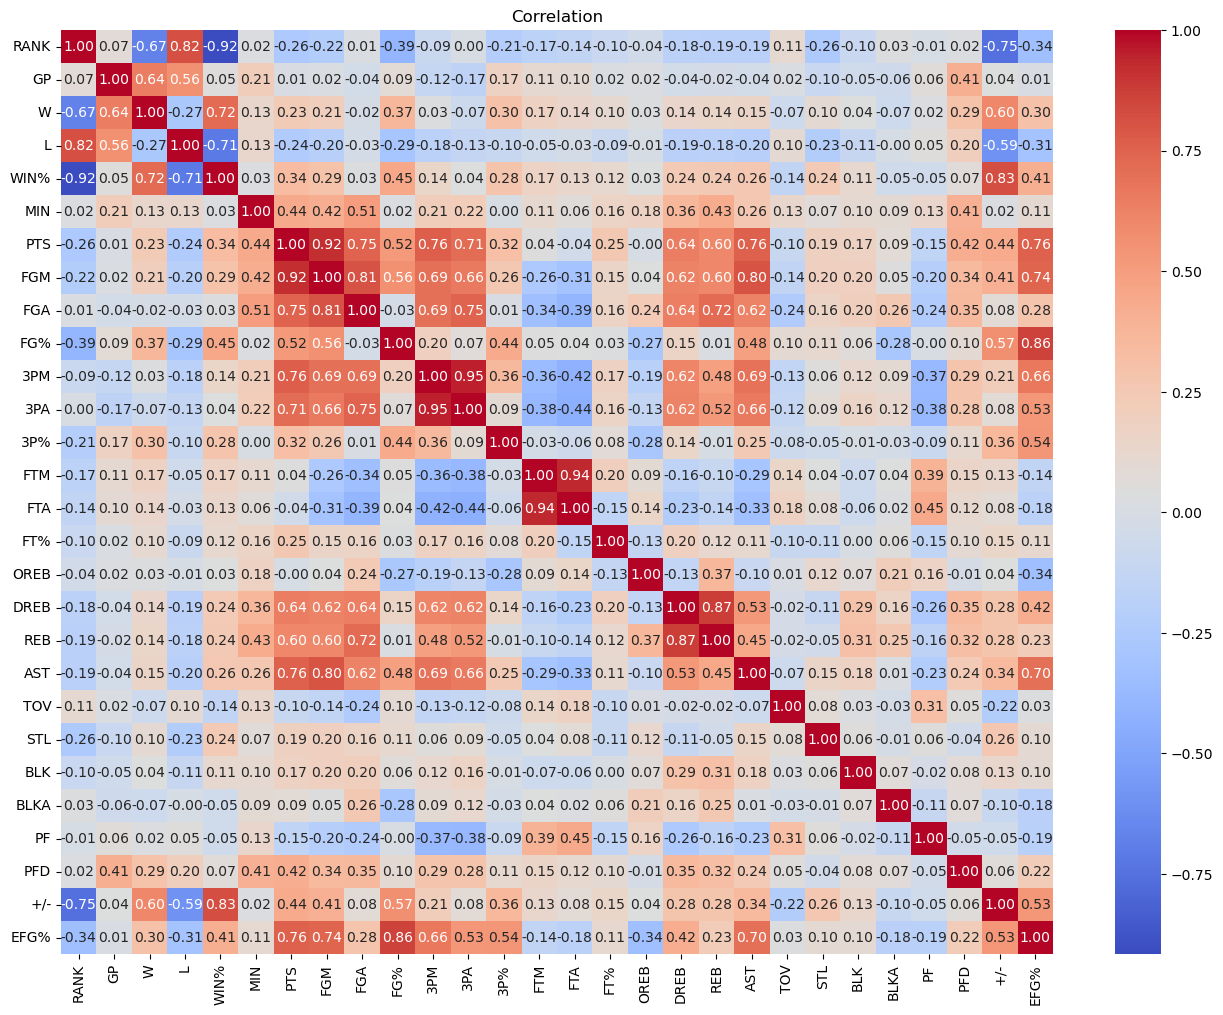

In [185]:
heatmap_columns = ['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR', 'EFG%']

# Create heatmap dataframe
heatmap_data = df[heatmap_columns]


#Create heatmap
plt.figure(figsize=(16,12))
sns.heatmap(heatmap_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')

# CURRENT DAY STATS

In [186]:
from selenium import webdriver
import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import Select
from selenium.webdriver.common.by import By
from selenium.webdriver.edge.service import Service

# Go to site to grab current day stats
# Set up the Selenium WebDriver (make sure to have the appropriate webdriver installed)

service = Service(executable_path="C:\Program Files (x86)\msedgedriver.exe")
driver = webdriver.Edge(service=service)

# URL of the webpage containing the dropdown menu
url = "https://www.nba.com/stats/teams/traditional?Season=2025-26&dir=A&sort=TEAM_NAME&PerMode=PerGame&SeasonType=Regular+Season"
driver.get(url)

# Introduce a wait to allow the page to load
time.sleep(2)

<>:12: SyntaxWarning: invalid escape sequence '\P'
<>:12: SyntaxWarning: invalid escape sequence '\P'
C:\Users\admin\AppData\Local\Temp\ipykernel_4720\4064468249.py:12: SyntaxWarning: invalid escape sequence '\P'
  service = Service(executable_path="C:\Program Files (x86)\msedgedriver.exe")


In [187]:
# Find the table on the page
table = WebDriverWait(driver, 5).until(
EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[3]/table'))
)

# Store the table data in a variable for looping
tbody = table.find_element(By.TAG_NAME, 'tbody')
rows = WebDriverWait(driver, 5).until(
    EC.presence_of_all_elements_located((By.TAG_NAME, 'tr'))
)


# Store Current Data in a table
table_data = []
for row in rows:
        try:
            row_cells = row.find_elements(By.TAG_NAME, 'td')
            # Check if the row contains cells (data) before processing
            if row_cells[9:]:
                row_text = [cell.text for cell in row_cells]
                table_data.append(row_text) 
        except:
            # Handle StaleElementReferenceException by refinding the row
            rows = WebDriverWait(driver, 5).until(
                EC.presence_of_all_elements_located((By.TAG_NAME, 'tr'))
            )
        
# Get table headers
headers = table.find_element(By.XPATH,'//*[@id="__next"]/div[2]/div[2]/div[3]/section[2]/div/div[2]/div[3]/table/thead').text.split(' ')
headers.pop(0)

# Close the window
driver.close()

In [188]:
import pandas as pd

# Store updated game stats in a dataframe
updated_game_stats = pd.DataFrame(table_data, columns=headers)
updated_game_stats

TEAM  GP   W   L  WIN%   MIN    PTS   FGM   FGA  ...  \
0              Atlanta Hawks  13   8   5  .615  48.0  117.1  42.4  87.8  ...   
1             Boston Celtics  13   6   7  .462  48.0  113.2  42.0  93.5  ...   
2              Brooklyn Nets  12   1  11  .083  48.0  108.9  37.6  86.8  ...   
3          Charlotte Hornets  12   4   8  .333  48.4  118.9  41.3  87.7  ...   
4              Chicago Bulls  11   6   5  .545  48.0  118.6  42.8  88.4  ...   
5        Cleveland Cavaliers  13   8   5  .615  48.4  122.2  42.7  94.2  ...   
6           Dallas Mavericks  13   3  10  .231  48.8  109.2  39.0  87.2  ...   
7             Denver Nuggets  11   9   2  .818  48.5  124.5  45.3  89.0  ...   
8            Detroit Pistons  13  11   2  .846  48.4  118.2  43.2  91.4  ...   
9      Golden State Warriors  14   8   6  .571  48.4  115.1  39.1  86.1  ...   
10           Houston Rockets  11   8   3  .727  48.9  125.5  45.1  90.5  ...   
11            Indiana Pacers  12   1  11  .083  48.8  108.5  38.0  95.2  ...   
12               LA Clippers  12   4   8  .333  48.8  111.5  39.9  83.3  ...   
13        Los Angeles Lakers  13   9   4  .692  48.0  116.1  41.7  82.5  ...   
14         Memphis Grizzlies  13   4   9  .308  48.0  112.8  38.9  89.5  ...   
15                Miami Heat  13   7   6  .538  48.4  125.3  45.3  92.1  ...   
16           Milwaukee Bucks  13   8   5  .615  48.4  120.2  44.8  88.0  ...   
17    Minnesota Timberwolves  12   8   4  .667  48.0  121.4  43.3  86.1  ...   
18      New Orleans Pelicans  12   2  10  .167  48.4  108.4  38.8  88.8  ...   
19           New York Knicks  12   8   4  .667  48.0  122.1  43.0  93.6  ...   
20     Oklahoma City Thunder  13  12   1  .923  49.5  122.5  43.5  91.5  ...   
21             Orlando Magic  13   7   6  .538  48.0  115.7  39.8  84.2  ...   
22        Philadelphia 76ers  12   7   5  .583  48.4  119.3  42.0  90.1  ...   
23              Phoenix Suns  13   8   5  .615  48.4  118.5  42.2  89.2  ...   
24    Portland Trail Blazers  12   6   6  .500  48.0  120.6  42.3  92.4  ...   
25          Sacramento Kings  13   3  10  .231  48.0  113.2  41.5  89.0  ...   
26         San Antonio Spurs  12   8   4  .667  48.4  118.4  42.4  85.8  ...   
27           Toronto Raptors  12   7   5  .583  48.0  119.8  43.8  88.8  ...   
28                 Utah Jazz  12   4   8  .333  48.4  116.3  39.8  89.7  ...   
29        Washington Wizards  12   1  11  .083  48.8  113.5  41.9  91.3  ...   

    DREB   REB   AST   TOV   STL  BLK BLKA    PF   PFD    +/-  
0   32.8  42.7  30.1  15.2  10.2  5.5  4.0  20.9  20.8    3.7  
1   31.2  44.4  24.1  11.4   8.6  5.3  4.8  23.7  19.5    4.7  
2   26.7  38.4  24.0  15.3   7.3  3.2  4.7  22.6  22.6  -14.3  
3   33.8  46.0  27.1  17.0   6.8  4.8  3.9  20.8  22.6   -2.5  
4   35.9  46.5  28.9  15.9   8.5  4.6  5.8  21.1  21.0   -0.3  
5   30.0  43.4  27.9  14.2   9.9  5.6  4.3  22.3  24.0    3.9  
6   35.2  45.1  24.1  17.1   8.8  6.1  4.8  21.4  23.4   -6.5  
7   35.7  47.4  29.5  13.9   8.1  3.6  4.5  20.0  22.2   13.4  
8   33.5  47.8  26.6  15.2  10.3  6.2  4.6  23.6  23.2    6.0  
9   31.5  41.6  26.9  16.4   9.7  4.6  3.9  20.9  19.7    0.5  
10  33.2  49.4  26.5  16.0   9.8  5.4  4.6  20.3  23.3   12.2  
11  32.8  47.4  23.3  13.8   6.3  4.8  4.4  24.3  24.0  -14.2  
12  30.8  40.8  24.5  16.8   9.3  5.3  4.2  20.4  20.1   -4.9  
13  31.2  40.7  25.8  16.9   9.4  3.5  3.9  20.2  23.1    0.2  
14  32.9  43.5  27.9  14.8   7.5  4.2  4.8  21.1  21.5   -7.9  
15  35.1  44.5  30.4  15.0   9.2  4.0  4.9  21.8  21.9    3.2  
16  31.8  40.3  27.3  14.3   8.1  5.0  3.8  23.4  20.4    1.5  
17  32.3  42.6  26.7  15.3   8.2  5.5  4.3  22.8  21.9    6.2  
18  27.9  41.3  22.8  15.1   8.8  2.8  6.9  20.7  21.6  -12.9  
19  32.0  46.8  27.7  13.6   8.5  3.8  4.7  21.1  21.3    6.8  
20  37.0  47.0  25.5  12.3  10.8  5.2  3.9  21.6  23.2   15.5  
21  33.8  45.6  24.4  16.5   7.6  5.5  5.3  22.2  24.7    1.9  
22  31.7  44.1  25.7  14.7   7.1  6.7  5.8  22.0  22.2    2.7  
23  30.

In [189]:
updated_game_stats.dtypes

        object
TEAM    object
GP      object
W       object
L       object
WIN%    object
MIN     object
PTS     object
FGM     object
FGA     object
FG%     object
3PM     object
3PA     object
3P%     object
FTM     object
FTA     object
FT%     object
OREB    object
DREB    object
REB     object
AST     object
TOV     object
STL     object
BLK     object
BLKA    object
PF      object
PFD     object
+/-     object
dtype: object

In [190]:
# Covert all object columns to numeric
for col in updated_game_stats.columns:
    updated_game_stats[col] = pd.to_numeric(updated_game_stats[col], errors='ignore')

# Create the effective field goal percentage column
updated_game_stats['EFG%'] = (updated_game_stats['FGM'] + 0.5 * updated_game_stats['3PM']) / updated_game_stats['FGA']

C:\Users\admin\AppData\Local\Temp\ipykernel_4720\4283258370.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  updated_game_stats[col] = pd.to_numeric(updated_game_stats[col], errors='ignore')


In [191]:
# Define abbreviation map
team_abbr = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

# Map the abbreviations to the TEAM column
updated_game_stats["ABBRV"] = updated_game_stats["TEAM"].map(team_abbr)


In [192]:
updated_game_stats.columns

Index(['', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%',
       '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST',
       'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'EFG%', 'ABBRV'],
      dtype='object')

# Find Games for Today

In [193]:
# Read in 2025 NBA schedule
schedule_df = pd.read_csv("./nba-2025-EasternStandardTime.csv")

# Display
schedule_df

Match Number  Round Number              Date               Location  \
0                1             1  21/10/2025 19:30          Paycom Center   
1                2             1  21/10/2025 22:00       Crypto.com Arena   
2                3             1  22/10/2025 19:00  Madison Square Garden   
3                5             1  22/10/2025 19:00        Spectrum Center   
4                6             1  22/10/2025 19:00             Kia Center   
...            ...           ...               ...                    ...   
1195          1196            23  12/04/2026 20:30          Paycom Center   
1196          1197            23  12/04/2026 20:30      Frost Bank Center   
1197          1198            23  12/04/2026 20:30       Crypto.com Arena   
1198          1199            23  12/04/2026 20:30            Intuit Dome   
1199          1200            23  12/04/2026 20:30            Moda Center   

                   Home Team              Away Team     Result  
0      Oklahoma City Thunder        Houston Rockets  125 - 124  
1         Los Angeles Lakers  Golden State Warriors  109 - 119  
2            New York Knicks    Cleveland Cavaliers  119 - 111  
3          Charlotte Hornets          Brooklyn Nets  136 - 117  
4              Orlando Magic             Miami Heat  125 - 121  
...                      ...                    ...        ...  
1195   Oklahoma City Thunder           Phoenix Suns        NaN  
1196       San Antonio Spurs         Denver Nuggets        NaN  
1197      Los Angeles Lakers              Utah Jazz        NaN  
1198             LA Clippers  Golden State Warriors        NaN  
1199  Portland Trail Blazers       Sacramento Kings        NaN  

[1200 rows x 7 columns]

In [194]:
# Use the same abbreviation map as above for both home and away team
team_abbr = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BKN",
    "Charlotte Hornets": "CHA",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "LA Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHX",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

# Map the abbreviations to the home team and away team column
schedule_df["HOME_ABBRV"] = schedule_df["Home Team"].map(team_abbr)
schedule_df["AWAY_ABBRV"] = schedule_df["Away Team"].map(team_abbr)


In [195]:
# Display
schedule_df.head()

Match Number  Round Number              Date               Location  \
0             1             1  21/10/2025 19:30          Paycom Center   
1             2             1  21/10/2025 22:00       Crypto.com Arena   
2             3             1  22/10/2025 19:00  Madison Square Garden   
3             5             1  22/10/2025 19:00        Spectrum Center   
4             6             1  22/10/2025 19:00             Kia Center   

               Home Team              Away Team     Result HOME_ABBRV  \
0  Oklahoma City Thunder        Houston Rockets  125 - 124        OKC   
1     Los Angeles Lakers  Golden State Warriors  109 - 119        LAL   
2        New York Knicks    Cleveland Cavaliers  119 - 111        NYK   
3      Charlotte Hornets          Brooklyn Nets  136 - 117        CHA   
4          Orlando Magic             Miami Heat  125 - 121        ORL   

  AWAY_ABBRV  
0        HOU  
1        GSW  
2        CLE  
3        BKN  
4        MIA

In [196]:
# Check data types
schedule_df.dtypes

Match Number     int64
Round Number     int64
Date            object
Location        object
Home Team       object
Away Team       object
Result          object
HOME_ABBRV      object
AWAY_ABBRV      object
dtype: object

In [197]:
# Split Date into Date column and Time column
schedule_df[['Date','Time']]= schedule_df['Date'].str.split(' ', expand=True)

In [198]:
schedule_df

Match Number  Round Number        Date               Location  \
0                1             1  21/10/2025          Paycom Center   
1                2             1  21/10/2025       Crypto.com Arena   
2                3             1  22/10/2025  Madison Square Garden   
3                5             1  22/10/2025        Spectrum Center   
4                6             1  22/10/2025             Kia Center   
...            ...           ...         ...                    ...   
1195          1196            23  12/04/2026          Paycom Center   
1196          1197            23  12/04/2026      Frost Bank Center   
1197          1198            23  12/04/2026       Crypto.com Arena   
1198          1199            23  12/04/2026            Intuit Dome   
1199          1200            23  12/04/2026            Moda Center   

                   Home Team              Away Team     Result HOME_ABBRV  \
0      Oklahoma City Thunder        Houston Rockets  125 - 124        OKC   
1         Los Angeles Lakers  Golden State Warriors  109 - 119        LAL   
2            New York Knicks    Cleveland Cavaliers  119 - 111        NYK   
3          Charlotte Hornets          Brooklyn Nets  136 - 117        CHA   
4              Orlando Magic             Miami Heat  125 - 121        ORL   
...                      ...                    ...        ...        ...   
1195   Oklahoma City Thunder           Phoenix Suns        NaN        OKC   
1196       San Antonio Spurs         Denver Nuggets        NaN        SAS   
1197      Los Angeles Lakers              Utah Jazz        NaN        LAL   
1198             LA Clippers  Golden State Warriors        NaN        LAC   
1199  Portland Trail Blazers       Sacramento Kings        NaN        POR   

     AWAY_ABBRV   Time  
0           HOU  19:30  
1           GSW  22:00  
2           CLE  19:00  
3           BKN  19:00  
4           MIA  19:00  
...         ...    ...  
1195        PHX  20:30  
1196        DEN  20:30  
1197        UTA  20:30  
1198        GSW  20:30  
1199        SAC  20:30  

[1200 rows x 10 columns]

In [199]:
# Convert 'Date' columne to datetime data type
schedule_df['Date'] = pd.to_datetime(schedule_df['Date'])

# Display   
schedule_df.dtypes

C:\Users\admin\AppData\Local\Temp\ipykernel_4720\453404986.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  schedule_df['Date'] = pd.to_datetime(schedule_df['Date'])


Match Number             int64
Round Number             int64
Date            datetime64[ns]
Location                object
Home Team               object
Away Team               object
Result                  object
HOME_ABBRV              object
AWAY_ABBRV              object
Time                    object
dtype: object

In [200]:
# Take only necessary columns   
schedule_df = schedule_df[['Date', 'Time', 'HOME_ABBRV', 'AWAY_ABBRV']]

# Display
schedule_df

Date   Time HOME_ABBRV AWAY_ABBRV
0    2025-10-21  19:30        OKC        HOU
1    2025-10-21  22:00        LAL        GSW
2    2025-10-22  19:00        NYK        CLE
3    2025-10-22  19:00        CHA        BKN
4    2025-10-22  19:00        ORL        MIA
...         ...    ...        ...        ...
1195 2026-04-12  20:30        OKC        PHX
1196 2026-04-12  20:30        SAS        DEN
1197 2026-04-12  20:30        LAL        UTA
1198 2026-04-12  20:30        LAC        GSW
1199 2026-04-12  20:30        POR        SAC

[1200 rows x 4 columns]

In [201]:
from datetime import datetime as dt, timedelta

# Get today's date
todays_date = dt.now().strftime('%Y-%m-%d')

# Create today's game dataframe
todays_games = schedule_df.loc[schedule_df['Date'] == todays_date]
todays_games

Date   Time HOME_ABBRV AWAY_ABBRV
186 2025-11-15  17:00        CLE        MEM
187 2025-11-15  19:00        CHA        OKC
188 2025-11-15  19:00        IND        TOR
189 2025-11-15  20:00        MIL        LAL
190 2025-11-15  20:00        MIN        DEN

# Model Predictions

In [202]:
df

RANK TEAM  GP  W  L  WIN%   MIN    PTS   FGM   FGA  ...   AST   TOV  \
0       1  GSW   6  6  0   1.0  48.0  112.7  40.7  86.3  ...  30.0  17.8   
1       2  BOS   5  4  1   0.8  48.0  121.8  42.8  95.0  ...  29.6  12.2   
2       2  LAC   5  4  1   0.8  48.0  105.8  38.8  81.8  ...  24.4  19.0   
3       2  MIA   5  4  1   0.8  48.0  112.6  41.0  90.2  ...  29.8  16.0   
4       2  NYK   5  4  1   0.8  48.0  114.2  39.6  91.6  ...  23.4  12.6   
..    ...  ...  .. .. ..   ...   ...    ...   ...   ...  ...   ...   ...   
730    15  MIL   1  0  1   0.0  48.0   94.0  32.0  75.0  ...  20.0  24.0   
731    15  NYK   1  0  1   0.0  48.0   86.0  30.0  79.0  ...  19.0  19.0   
732    15  ORL   2  0  2   0.0  48.0   93.5  34.0  74.5  ...  16.0  17.5   
733    15  PHI   1  0  1   0.0  53.0   79.0  26.0  79.0  ...   7.0  20.0   
734    15  PHX   1  0  1   0.0  48.0   79.0  26.0  78.0  ...  17.0  18.0   

      STL  BLK  BLKA    PF   PFD   +/-     YEAR      EFG%  
0     8.8  6.0   4.5  20.5  18.3  17.3  2024-25  0.565469  
1     9.8  5.6   1.2  20.2  21.6  16.6  2024-25  0.552632  
2    13.6  7.0   5.2  19.0  21.0   9.2  2024-25  0.530562  
3    15.2  4.4   5.4  22.4  21.6   3.2  2024-25  0.528825  
4     8.8  4.2   5.0  17.8  24.6   7.0  2024-25  0.500000  
..    ...  ...   ...   ...   ...   ...      ...       ...  
730   9.0  4.0   7.0  26.0   0.0 -11.0  2003-04  0.440000  
731  11.0  5.0   7.0  28.0   0.0 -18.0  2003-04  0.398734  
732  10.5  5.0   4.5  25.0   0.0  -8.5  2003-04  0.479866  
733   7.0  3.0   6.0  30.0   0.0  -7.0  2003-04  0.335443  
734   8.0  9.0   5.0  30.0   0.0 -22.0  2003-04  0.346154  

[608 rows x 30 columns]

In [203]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR', 'EFG%'],
      dtype='object')

In [204]:
# CREATE A DATAFRAME WITH THE IMPORTANT FEATURES FOR MODEL
features_only_df = updated_game_stats[['ABBRV',"FGA", "FG%", "3PA", "PF", "PFD", "DREB", "AST", "WIN%", "FT%", "3PM", "EFG%", 'PTS']]
features_only_df


ABBRV   FGA   FG%   3PA    PF   PFD  DREB   AST   WIN%   FT%   3PM  \
0    ATL  87.8  48.2  34.5  20.9  20.8  32.8  30.1  0.615  78.6  12.8   
1    BOS  93.5  44.9  44.8  23.7  19.5  31.2  24.1  0.462  77.7  15.0   
2    BKN  86.8  43.3  41.8  22.6  22.6  26.7  24.0  0.083  78.8  13.6   
3    CHA  87.7  47.1  39.8  20.8  22.6  33.8  27.1  0.333  82.0  14.8   
4    CHI  88.4  48.5  34.2  21.1  21.0  35.9  28.9  0.545  79.6  13.5   
5    CLE  94.2  45.3  46.6  22.3  24.0  30.0  27.9  0.615  77.2  16.2   
6    DAL  87.2  44.7  34.0  21.4  23.4  35.2  24.1  0.231  75.0  10.2   
7    DEN  89.0  50.9  33.5  20.0  22.2  35.7  29.5  0.818  84.4  11.9   
8    DET  91.4  47.2  32.0  23.6  23.2  33.5  26.6  0.846  73.7  11.4   
9    GSW  86.1  45.4  43.0  20.9  19.7  31.5  26.9  0.571  83.3  15.9   
10   HOU  90.5  49.8  31.3  20.3  23.3  33.2  26.5  0.727  78.5  13.4   
11   IND  95.2  39.9  37.8  24.3  24.0  32.8  23.3  0.083  76.9  11.2   
12   LAC  83.3  47.9  36.8  20.4  20.1  30.8  24.5  0.333  81.0  13.3   
13   LAL  82.5  50.5  32.3  20.2  23.1  31.2  25.8  0.692  78.3  10.8   
14   MEM  89.5  43.5  39.8  21.1  21.5  32.9  27.9  0.308  83.2  13.2   
15   MIA  92.1  49.2  36.5  21.8  21.9  35.1  30.4  0.538  80.1  14.0   
16   MIL  88.0  50.9  37.1  23.4  20.4  31.8  27.3  0.615  70.2  15.3   
17   MIN  86.1  50.3  35.5  22.8  21.9  32.3  26.7  0.667  77.7  14.2   
18   NOP  88.8  43.7  34.8  20.7  21.6  27.9  22.8  0.167  75.9  12.3   
19   NYK  93.6  45.9  44.2  21.1  21.3  32.0  27.7  0.667  83.4  16.8   
20   OKC  91.5  47.6  40.3  21.6  23.2  37.0  25.5  0.923  86.3  13.6   
21   ORL  84.2  47.3  32.1  22.2  24.7  33.8  24.4  0.538  79.6  10.9   
22   PHI  90.1  46.6  36.1  22.0  22.2  31.7  25.7  0.583  80.1  13.8   
23   PHX  89.2  47.3  41.5  23.1  20.8  30.8  27.5  0.615  80.9  16.0   
24   POR  92.4  45.8  41.4  23.2  23.3  28.9  25.4  0.500  82.0  13.9   
25   SAC  89.0  46.7  31.4  20.8  20.4  30.4  26.5  0.231  75.9  11.7   
26   SAS  85.8  49.4  35.6  22.0  22.9  34.2  26.3  0.667  78.9  12.8   
27   TOR  88.8  49.3  33.7  23.5  20.6  31.9  30.3  0.583  79.0  12.8   
28   UTA  89.7  44.3  40.4  22.0  23.7  33.3  29.3  0.333  82.2  13.4   
29   WAS  91.3  45.9  36.3  23.6  18.3  33.6  25.6  0.083  73.4  13.6   

        EFG%    PTS  
0   0.555809  117.1  
1   0.529412  113.2  
2   0.511521  108.9  
3   0.555302  118.9  
4   0.560520  118.6  
5   0.539278  122.2  
6   0.505734  109.2  
7   0.575843  124.5  
8   0.535011  118.2  
9   0.546458  115.1  
10  0.572376  125.5  
11  0.457983  108.5  
12  0.558824  111.5  
13  0.570909  116.1  
14  0.508380  112.8  
15  0.567861  125.3  
16  0.596023  120.2  
17  0.585366  121.4  
18  0.506194  108.4  
19  0.549145  122.1  
20  0.549727  122.5  
21  0.537411  115.7  
22  0.542730  119.3  
23  0.562780  118.5  
24  0.533009  120.6  
25  0.532022  113.2  
26  0.568765  118.4  
27  0.565315  119.8  
28  0.518395  116.3  
29  0.533406  113.5

In [205]:
df.columns

Index(['RANK', 'TEAM', 'GP', 'W', 'L', 'WIN%', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB',
       'AST', 'TOV', 'STL', 'BLK', 'BLKA', 'PF', 'PFD', '+/-', 'YEAR', 'EFG%'],
      dtype='object')

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Ensure correct feature order used in training
feature_names = ["FGA", "FG%", "3PA", "PF", "PFD", "DREB", "AST", "WIN%", "FT%", "3PM", "EFG%"]

# Hand pick the features
X = df[feature_names]

# Create target variabble
y = df["PTS"]

# Train model
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model and get score
model = LinearRegression()
model.fit(Xtrain, ytrain)
print(round(model.score(Xtest, ytest),3))


0.888


In [207]:
# Get home and away team and convert to list
home_team = todays_games['HOME_ABBRV'].to_list()
away_team = todays_games['AWAY_ABBRV'].to_list()

# Loop through each game

for i in range(len(home_team)):
    # Store each team as variables
    home = home_team[i]
    away = away_team[i]
    
    # Select both teams' feature rows
    selected = features_only_df.loc[
        (features_only_df["ABBRV"] == home) | 
        (features_only_df["ABBRV"] == away)
    ].copy()

    # Predict points for both teams
    selected["Predicted_PTS"] = model.predict(selected[feature_names])
    selected["Predicted_PTS"] = selected["Predicted_PTS"].round(1)

    # Sort by predicted points
    selected = selected.sort_values("Predicted_PTS", ascending=False)

    # Extract results
    winner_abbr = selected.iloc[0]["ABBRV"]
    loser_abbr = selected.iloc[1]["ABBRV"]
    winner_pts = selected.iloc[0]["Predicted_PTS"]
    loser_pts = selected.iloc[1]["Predicted_PTS"]
    margin = round(abs(winner_pts - loser_pts), 1)
    total_points = round(winner_pts + loser_pts, 1)

    # Print results table
    print(selected[["ABBRV", "Predicted_PTS"]])

    # Final summary line
    print(f"\n{home} vs {away}: {winner_abbr} wins by ~{margin} points | Total: {total_points}\n")

   ABBRV  Predicted_PTS
5    CLE          118.5
14   MEM          109.2

CLE vs MEM: CLE wins by ~9.3 points | Total: 227.7

   ABBRV  Predicted_PTS
20   OKC          121.2
3    CHA          114.9

CHA vs OKC: OKC wins by ~6.3 points | Total: 236.1

   ABBRV  Predicted_PTS
27   TOR          118.0
11   IND          106.0

IND vs TOR: TOR wins by ~12.0 points | Total: 224.0

   ABBRV  Predicted_PTS
16   MIL          120.6
13   LAL          113.4

MIL vs LAL: MIL wins by ~7.2 points | Total: 234.0

   ABBRV  Predicted_PTS
7    DEN          121.2
17   MIN          119.1

MIN vs DEN: DEN wins by ~2.1 points | Total: 240.3

